<a href="https://colab.research.google.com/github/KiambiC9/Numerical-Simulation-Monte-Carlo-Simulation/blob/main/204843_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import math
from math import sqrt, exp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm
from scipy.stats import norm

Question 1

In [26]:
# Parameters
r = 0.05  # interest rate
sigma = 0.20  # volatility
S0 = 100  # initial stock price
E = 100  # strike price
T = 0.5  # time to maturity (6 months)
M = 10000  # number of simulation paths
N = 100  # number of time steps

dt = T / N  # time step
np.random.seed(42)

# Simulate M paths for S
ST = []
for _ in range(M):
    S = S0
    for _ in range(N):
        z = np.random.standard_normal()
        S = S + r * S * dt + sigma * S * sqrt(dt) * z
    ST.append(S)

# Calculate the payoff for each path and approximate the expectation
payoffs = [max(0, s - E) for s in ST]
simulated_price = np.mean(payoffs) * exp(-r * T)

print(f"Euler-Maruyama Monte Carlo European Call Option Price: {simulated_price}")

# Black-Scholes formula for European call option
def black_scholes_call(S, E, T, r, sigma):
    d1 = (np.log(S / E) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - E * math.exp(-r * T) * norm.cdf(d2)
    return call_price

bs_price = black_scholes_call(S0, E, T, r, sigma)
print(f"Black-Scholes European Call Option Price: {bs_price}")



Euler-Maruyama Monte Carlo European Call Option Price: 6.7883023289243
Black-Scholes European Call Option Price: 6.888728577680624


In [27]:
# Calculate the standard error of the Monte Carlo estimate
standard_error = np.std(payoffs) / sqrt(M)

print(f"Standard Error of Simulated Price: {standard_error}")

Standard Error of Simulated Price: 0.10157118983664462


In [28]:
# Calculate the 95% confidence interval
# For a 95% confidence interval, the z-score is approximately 1.96
confidence_interval_lower = simulated_price - 1.96 * standard_error
confidence_interval_upper = simulated_price + 1.96 * standard_error

print(f"95% Confidence Interval: ({confidence_interval_lower}, {confidence_interval_upper})")

95% Confidence Interval: (6.589222796844477, 6.987381861004123)


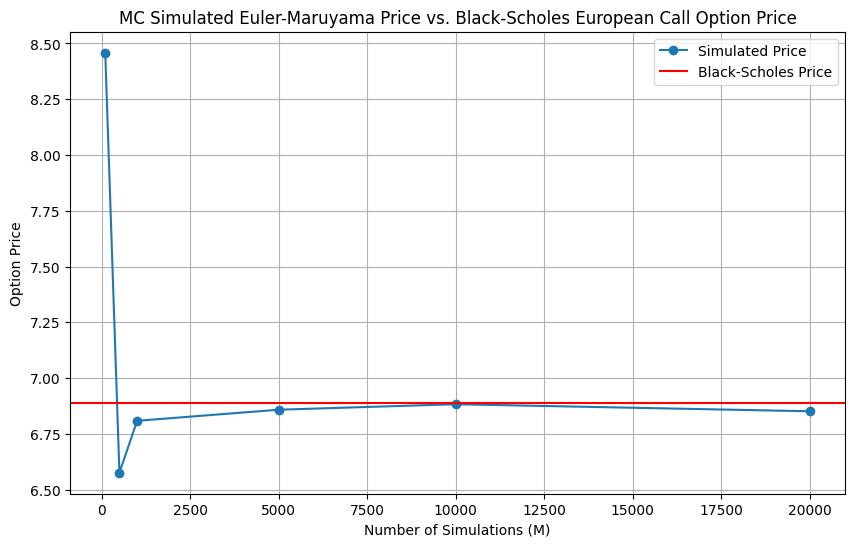

In [29]:
# Compare graphically for various M
M_values = [100, 500, 1000, 5000, 10000, 20000]
simulated_prices_M = []

for m in M_values:
    ST_m = []
    for _ in range(m):
        S = S0
        for _ in range(N):
            z = np.random.standard_normal()
            S = S = S + r * S * dt + sigma * S * sqrt(dt) * z
        ST_m.append(S)
    payoffs_m = [max(0, s - E) for s in ST_m]
    simulated_prices_M.append(np.mean(payoffs_m) * exp(-r * T))

plt.figure(figsize=(10, 6))
plt.plot(M_values, simulated_prices_M, marker='o', label='Simulated Price')
plt.axhline(y=bs_price, color='r', linestyle='-', label='Black-Scholes Price')
plt.xlabel("Number of Simulations (M)")
plt.ylabel("Option Price")
plt.title("MC Simulated Euler-Maruyama Price vs. Black-Scholes European Call Option Price")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
#Explicit solution for the GBM


Simulated European Call Option Price (Explicit GBM): 6.887435442089272
Standard Error of Simulated Price (Explicit GBM): 0.10072562734512784
95% Confidence Interval (Explicit GBM): (6.690013212492821, 7.084857671685723)


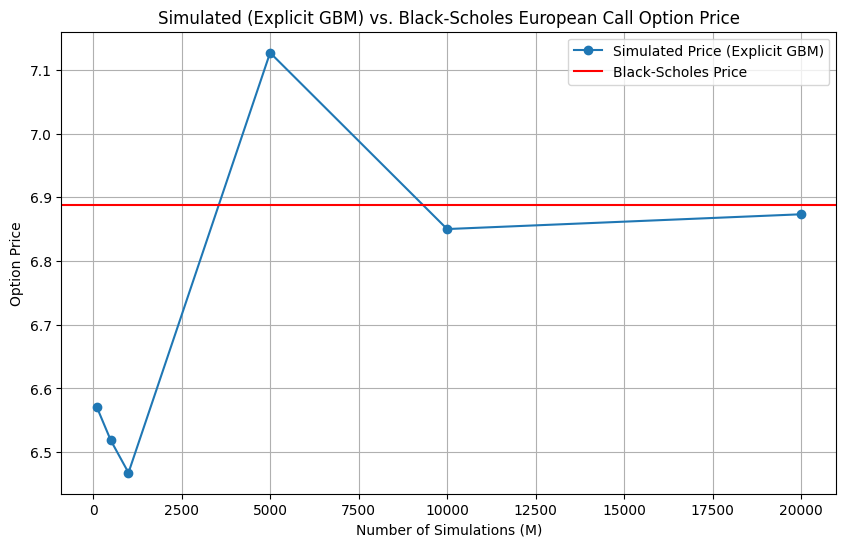

In [31]:
#For reproducibility
np.random.seed(42)
# Explicit solution for the GBM
ST_explicit = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * sqrt(T) * np.random.standard_normal(M))

# Calculate the payoff for each path and approximate the expectation
payoffs_explicit = np.maximum(ST_explicit - E, 0.0)
simulated_price_explicit = np.mean(payoffs_explicit) * exp(-r * T)

print(f"Simulated European Call Option Price (Explicit GBM): {simulated_price_explicit}")

# Calculate the standard error of the Monte Carlo estimate (Explicit GBM)
standard_error_explicit = np.std(payoffs_explicit) / sqrt(M)
print(f"Standard Error of Simulated Price (Explicit GBM): {standard_error_explicit}")

# Calculate the 95% confidence interval (Explicit GBM)
# For a 95% confidence interval, the z-score is approximately 1.96
confidence_interval_lower_explicit = simulated_price_explicit - 1.96 * standard_error_explicit
confidence_interval_upper_explicit = simulated_price_explicit + 1.96 * standard_error_explicit
print(f"95% Confidence Interval (Explicit GBM): ({confidence_interval_lower_explicit}, {confidence_interval_upper_explicit})")


# Compare graphically for various M using explicit solution
M_values = [100, 500, 1000, 5000, 10000, 20000]
simulated_prices_M_explicit = []

for m in M_values:
    ST_m_explicit = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * sqrt(T) * np.random.standard_normal(m))
    payoffs_m_explicit = np.maximum(ST_m_explicit - E, 0.0)
    simulated_prices_M_explicit.append(np.mean(payoffs_m_explicit) * exp(-r * T))

plt.figure(figsize=(10, 6))
plt.plot(M_values, simulated_prices_M_explicit, marker='o', label='Simulated Price (Explicit GBM)')
plt.axhline(y=bs_price, color='r', linestyle='-', label='Black-Scholes Price')
plt.xlabel("Number of Simulations (M)")
plt.ylabel("Option Price")
plt.title("Simulated (Explicit GBM) vs. Black-Scholes European Call Option Price")
plt.legend()
plt.grid(True)
plt.show()